## Chapter 2
Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn import metrics
mpl.rcParams['figure.dpi'] = 400

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv')
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


### Exercise 10:  Obtaining Predicted Probabilities from a Trained Logistic Regression Model
Split the data into training and test sets

In [4]:
from sklearn.model_selection import train_test_split

X = df[['EDUCATION']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training data with regression logistic model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Verify the accuracy of the model

In [6]:
from sklearn.metrics import accuracy_score

print(f'The accuracy model : {model.score(X_test, y_test)}')
print(f'The accuracy score : {accuracy_score(y_test, model.predict(X_test))}')

The accuracy model : 0.7843615225951622
The accuracy score : 0.7843615225951622


#### Verify Confusion Matrix in the model

In [7]:
from sklearn import metrics
metrics.confusion_matrix(y_test, model.predict(X_test))

array([[4183,    0],
       [1150,    0]], dtype=int64)

Understanding confusion matrix: <br/>
- TN = True Negative = 0
- FP = False Positive = 1
- FN = False Negative = 2
- TP = True Positive = 3


Text(0, 0.5, 'Frequency')

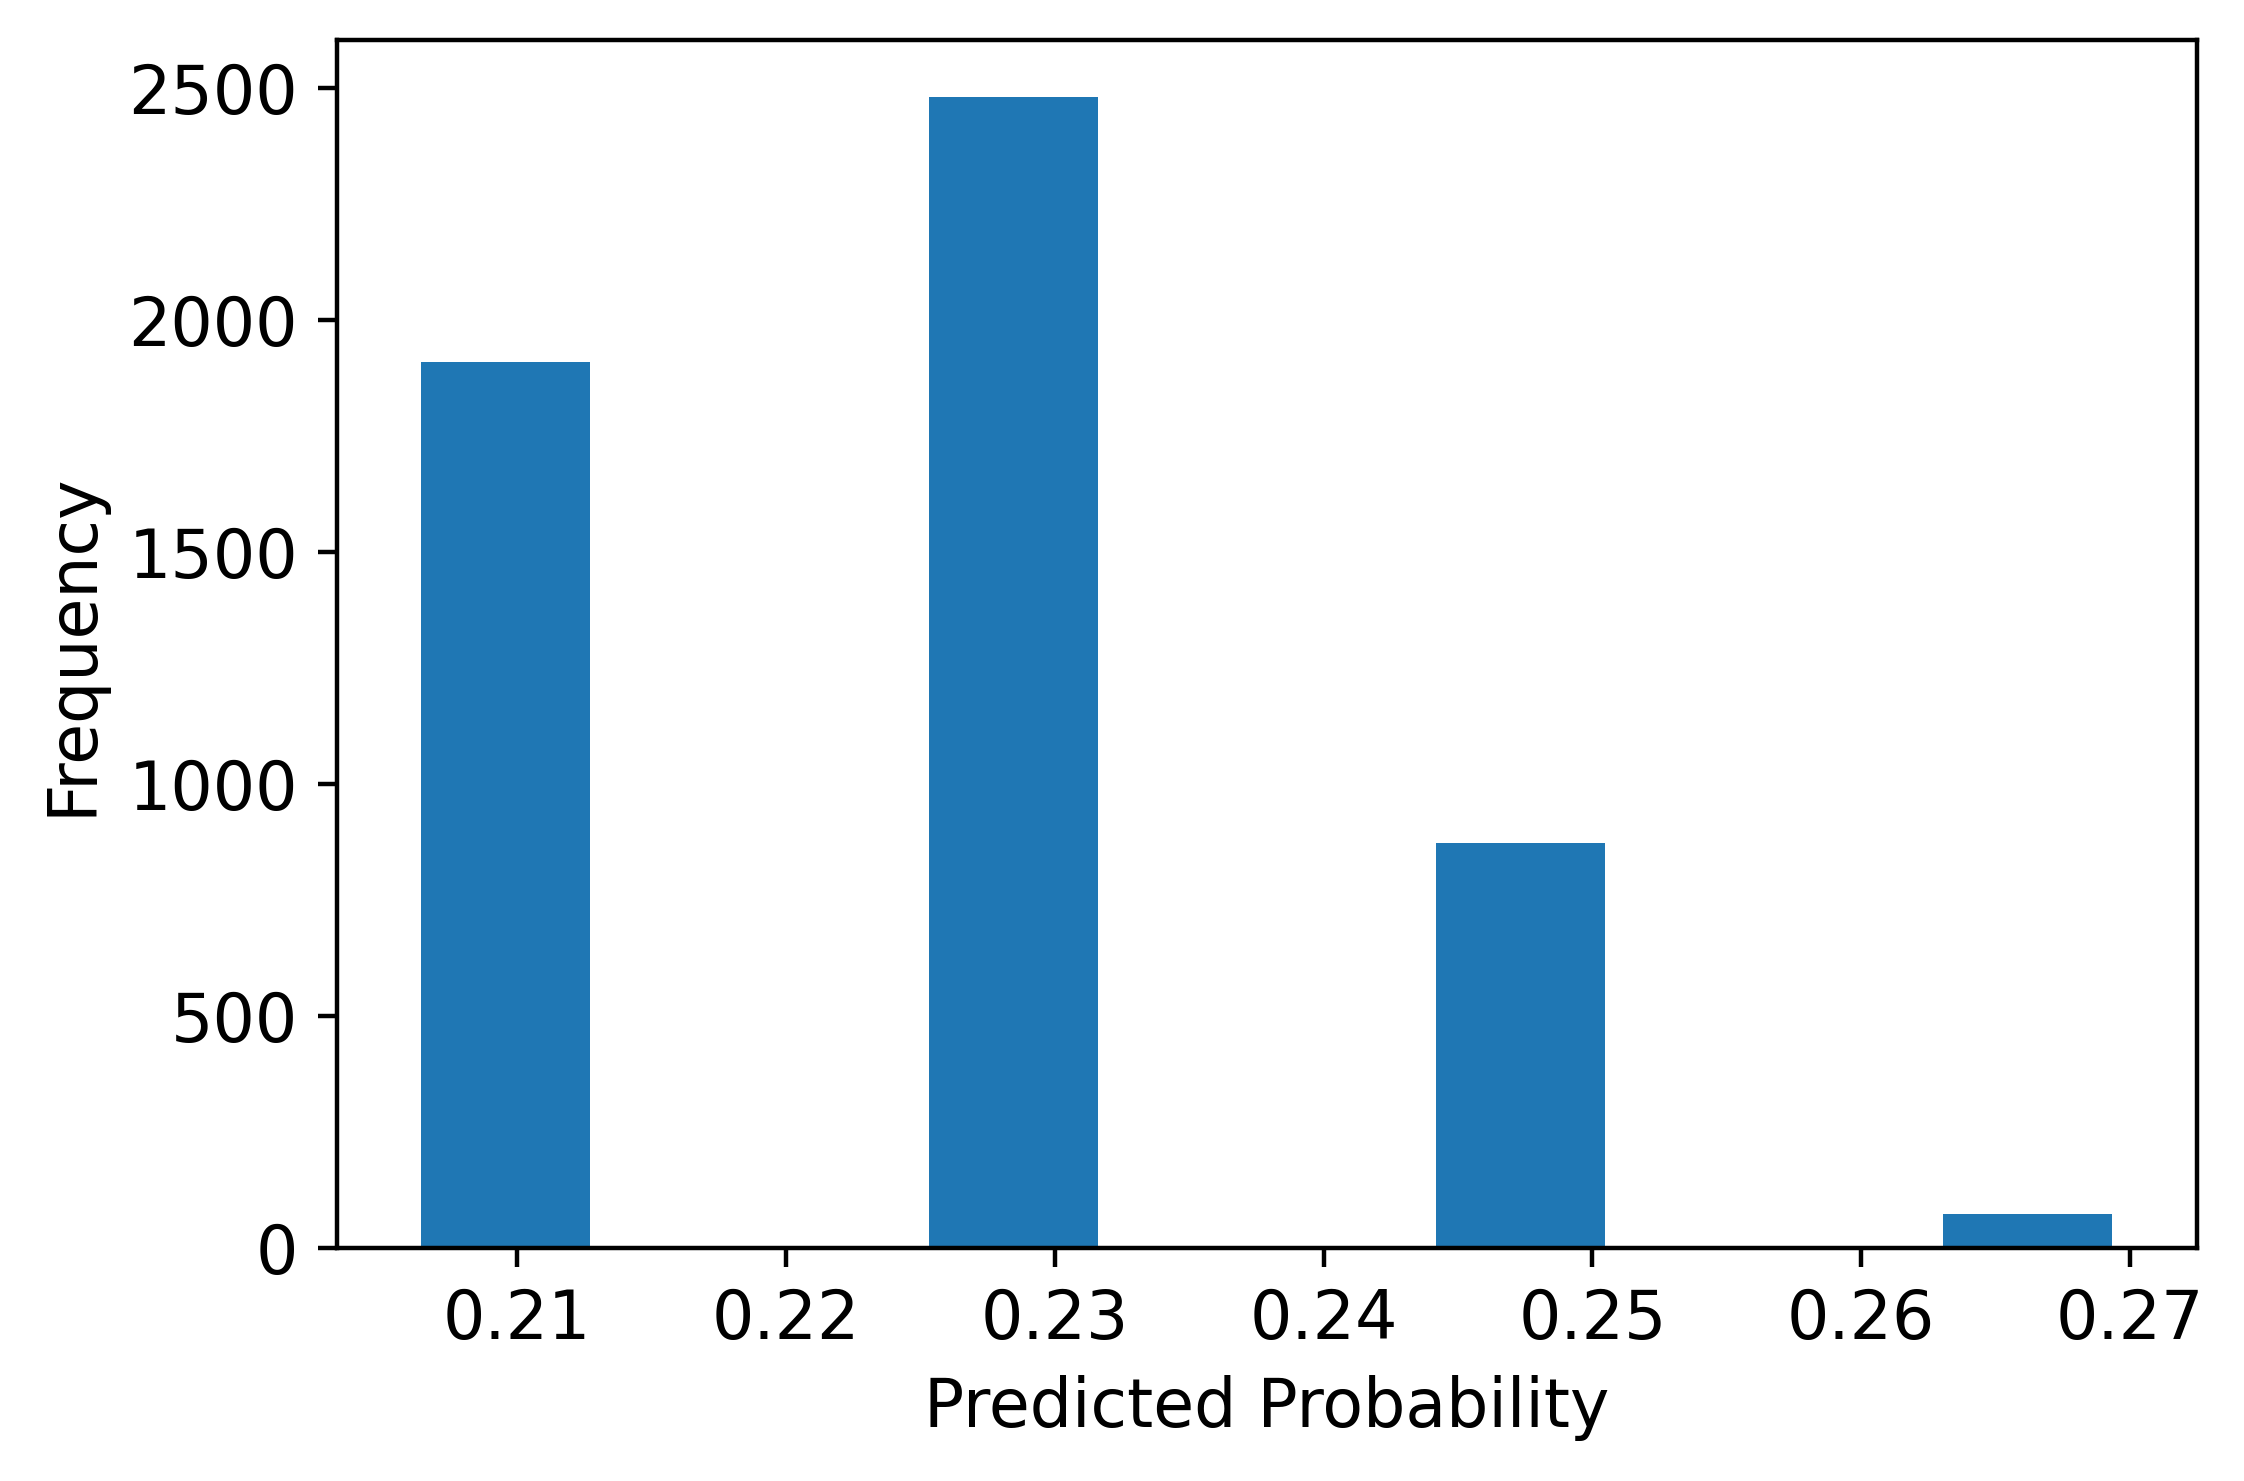

In [8]:
y_pred_proba = model.predict_proba(X_test)
pos_proba = y_pred_proba[:, 1]

mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

Creating chart stacked and split in Positive samples and negative samples

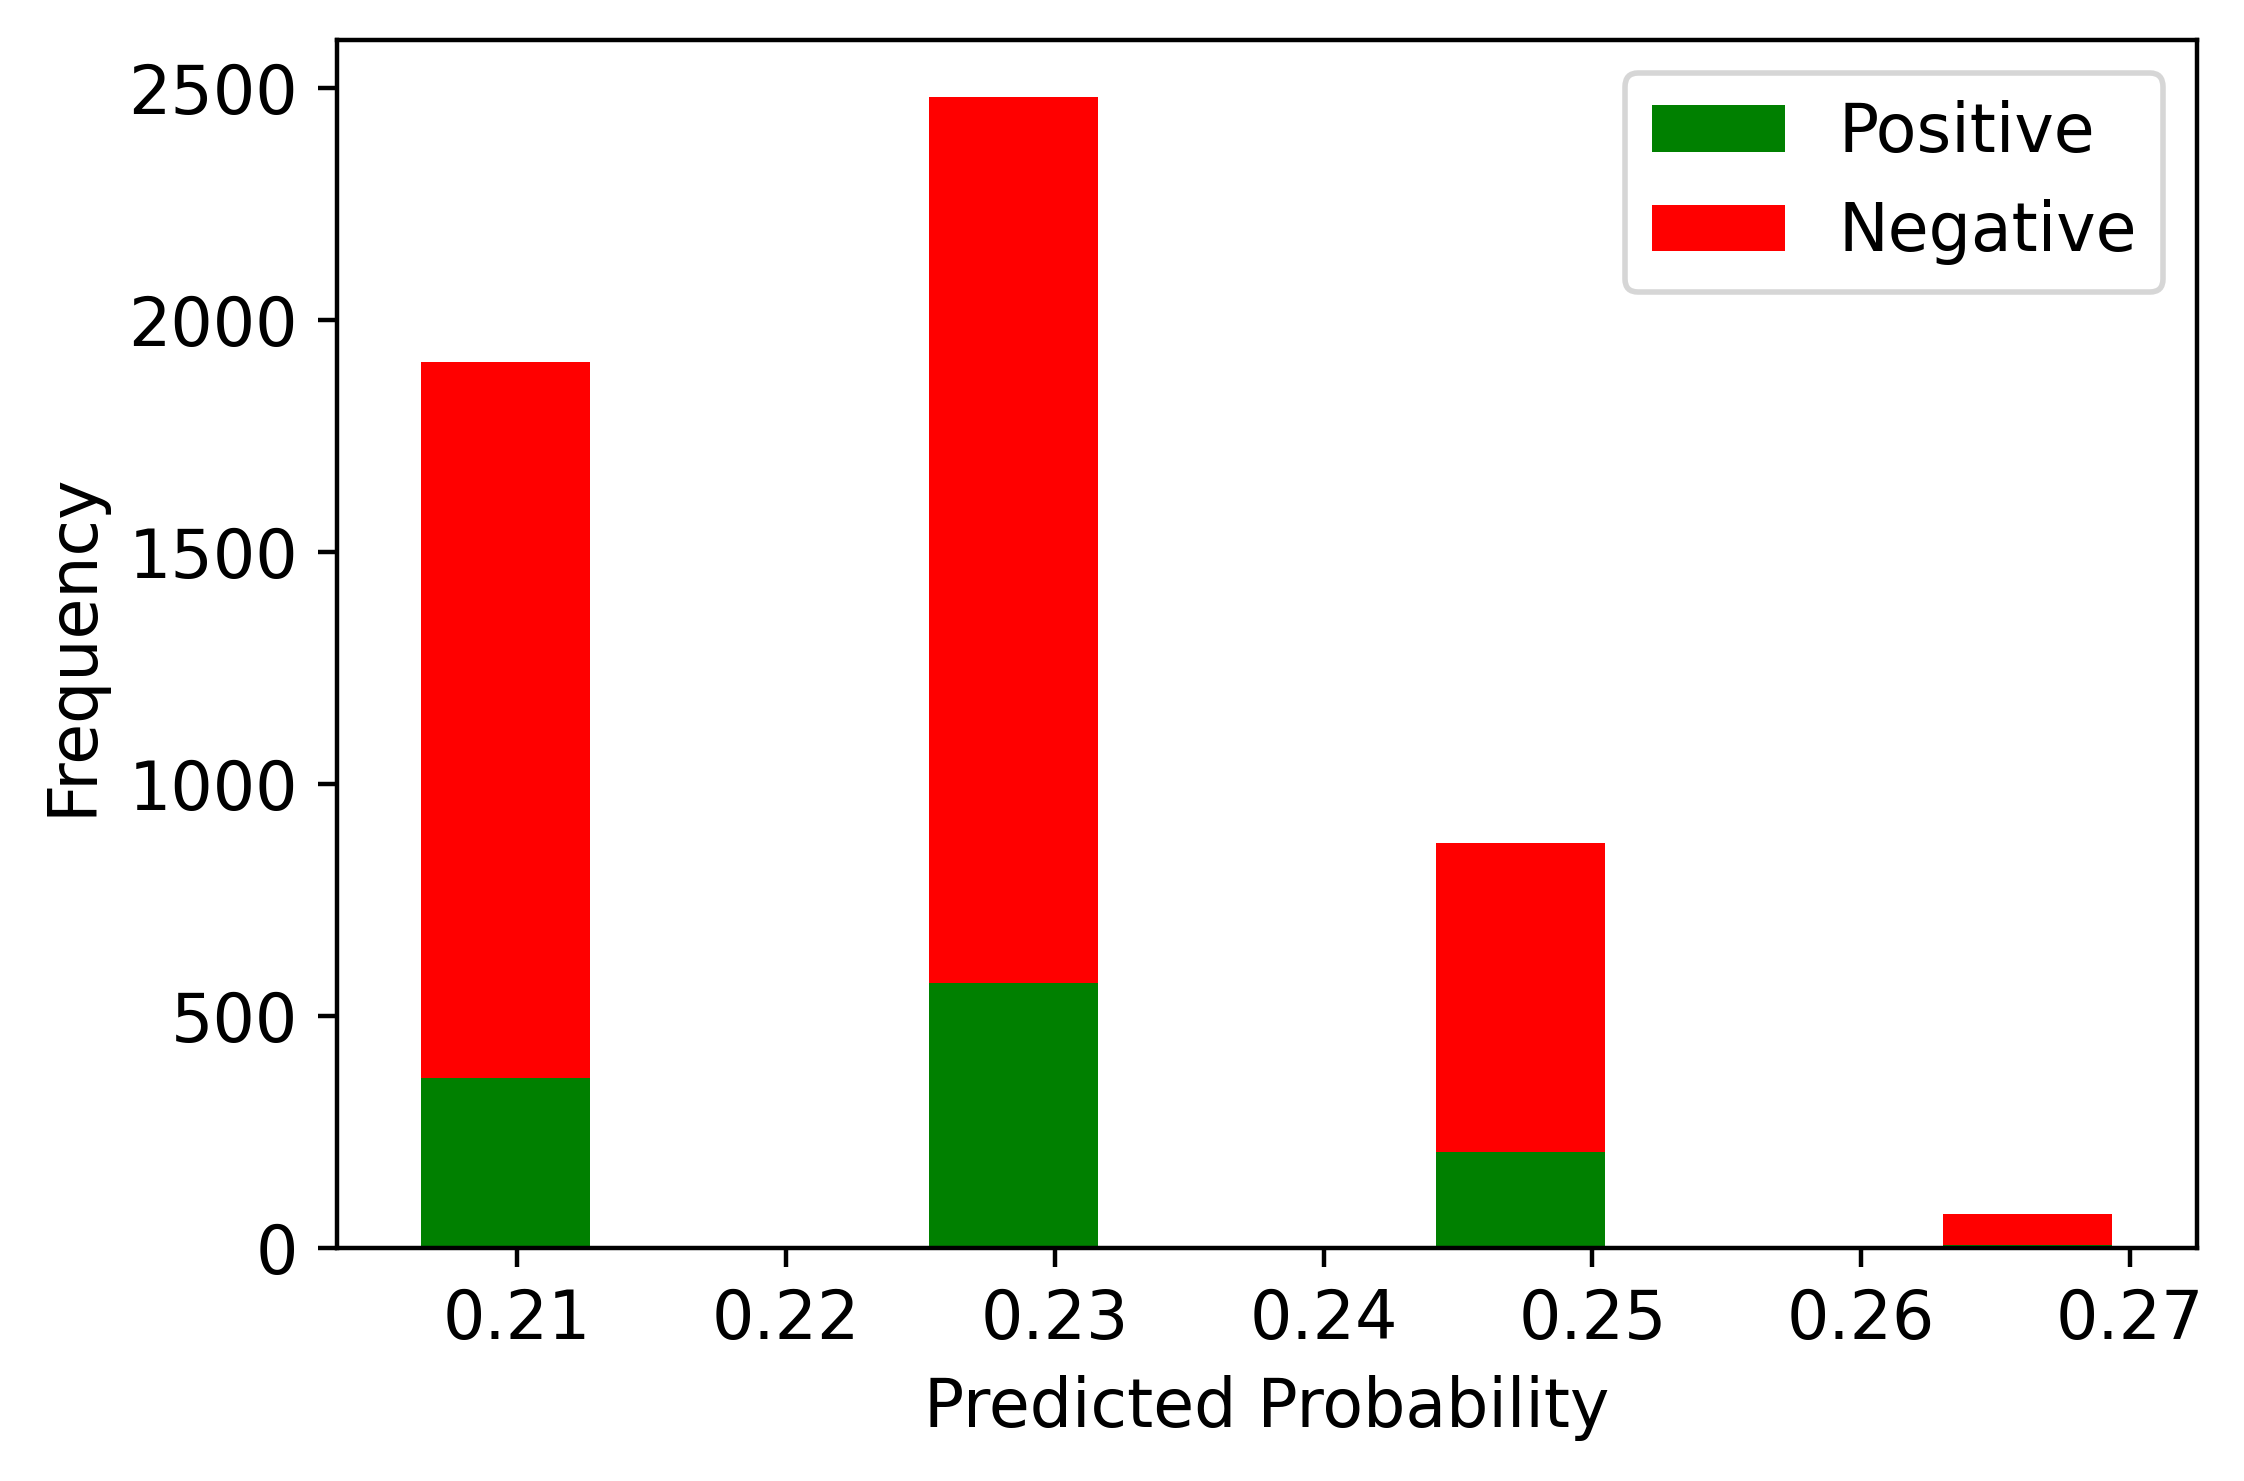

In [9]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], stacked=True, color=['g', 'r'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(['Positive', 'Negative'])



#### The Receiver Operating Characteristic (ROC) curve

Text(0.5, 1.0, 'ROC curve')

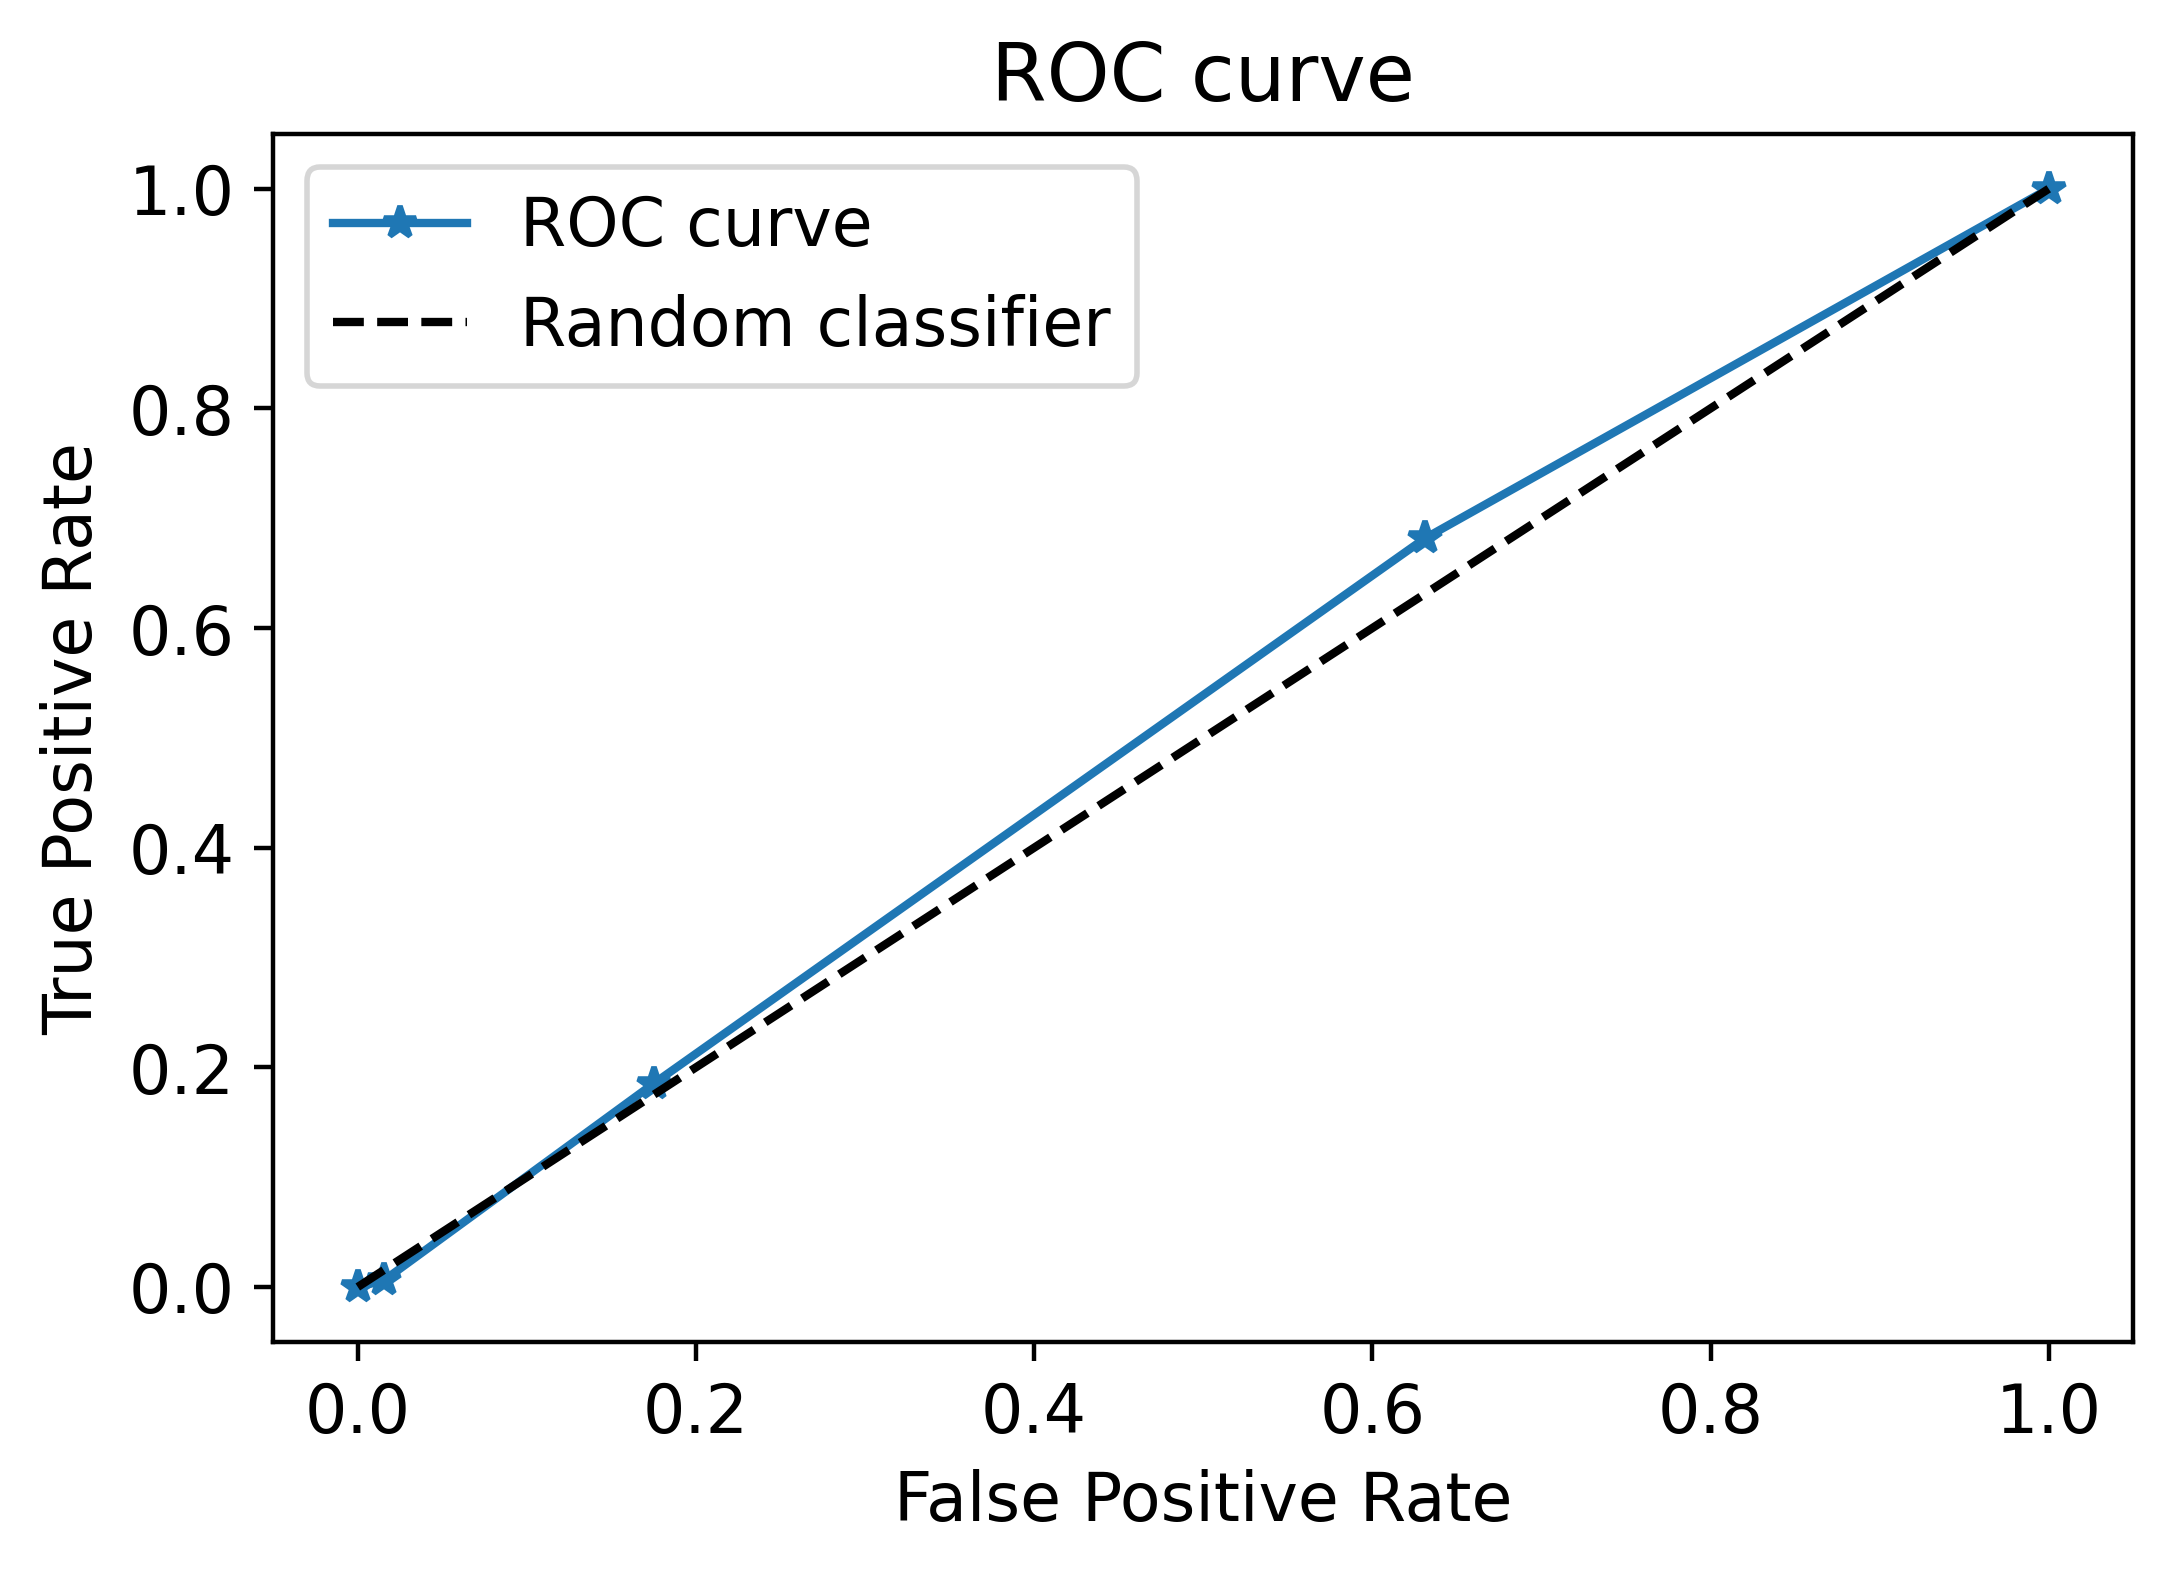

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(['ROC curve', 'Random classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [11]:
thresholds
print(f'The threshold for the model is {thresholds[-1]}')
print(f'The probability for the model is {pos_proba[-1] > thresholds[-1]}')
print('The AUC Score is: ', metrics.roc_auc_score(y_test, pos_proba))

The threshold for the model is 0.20643678032987506
The probability for the model is False
The AUC Score is:  0.52319772578449


Activity 2: <br/>
1. Use scikit-learn's train_test_split to make a new set of training and testing data. This time, instead of EDUCATION, use LIMIT_BAL: the account's credit limit.
2. Train a logistic regression model using the training data from your split.
3. Create the array of predicted probabilities for the testing data.
4. Calculate the ROC AUC using the predicted probabilities and the true labels of the 
testing data. Compare this to the ROC AUC from using the EDUCATION feature.
5. Plot the ROC curve.
6. Calculate the data for the precision-recall curve on the testing data using scikitlearn functionality.
7. Plot the precision-recall curve using matplotlib.
8. Use scikit-learn to calculate the area under the precision-recall curve
9. Now recalculate the ROC AUC, except this time do it for the training data. How is this different, conceptually and quantitatively, from your earlier calculation?


In [32]:
X = df[['LIMIT_BAL']]
y = df['default payment next month']

Spliting training and testing data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training data with regression logistic model

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predicted values for the testing data

In [40]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [44]:
print(f'The accuracy model : {model.score(X_test, y_test)}')
print(f'The AUC score is: {metrics.roc_auc_score(y_test, y_pred_proba[:, 1])}')




The accuracy model : 0.7843615225951622
The AUC score is: 0.6302043467866831


Text(0.5, 1.0, 'ROC curve')

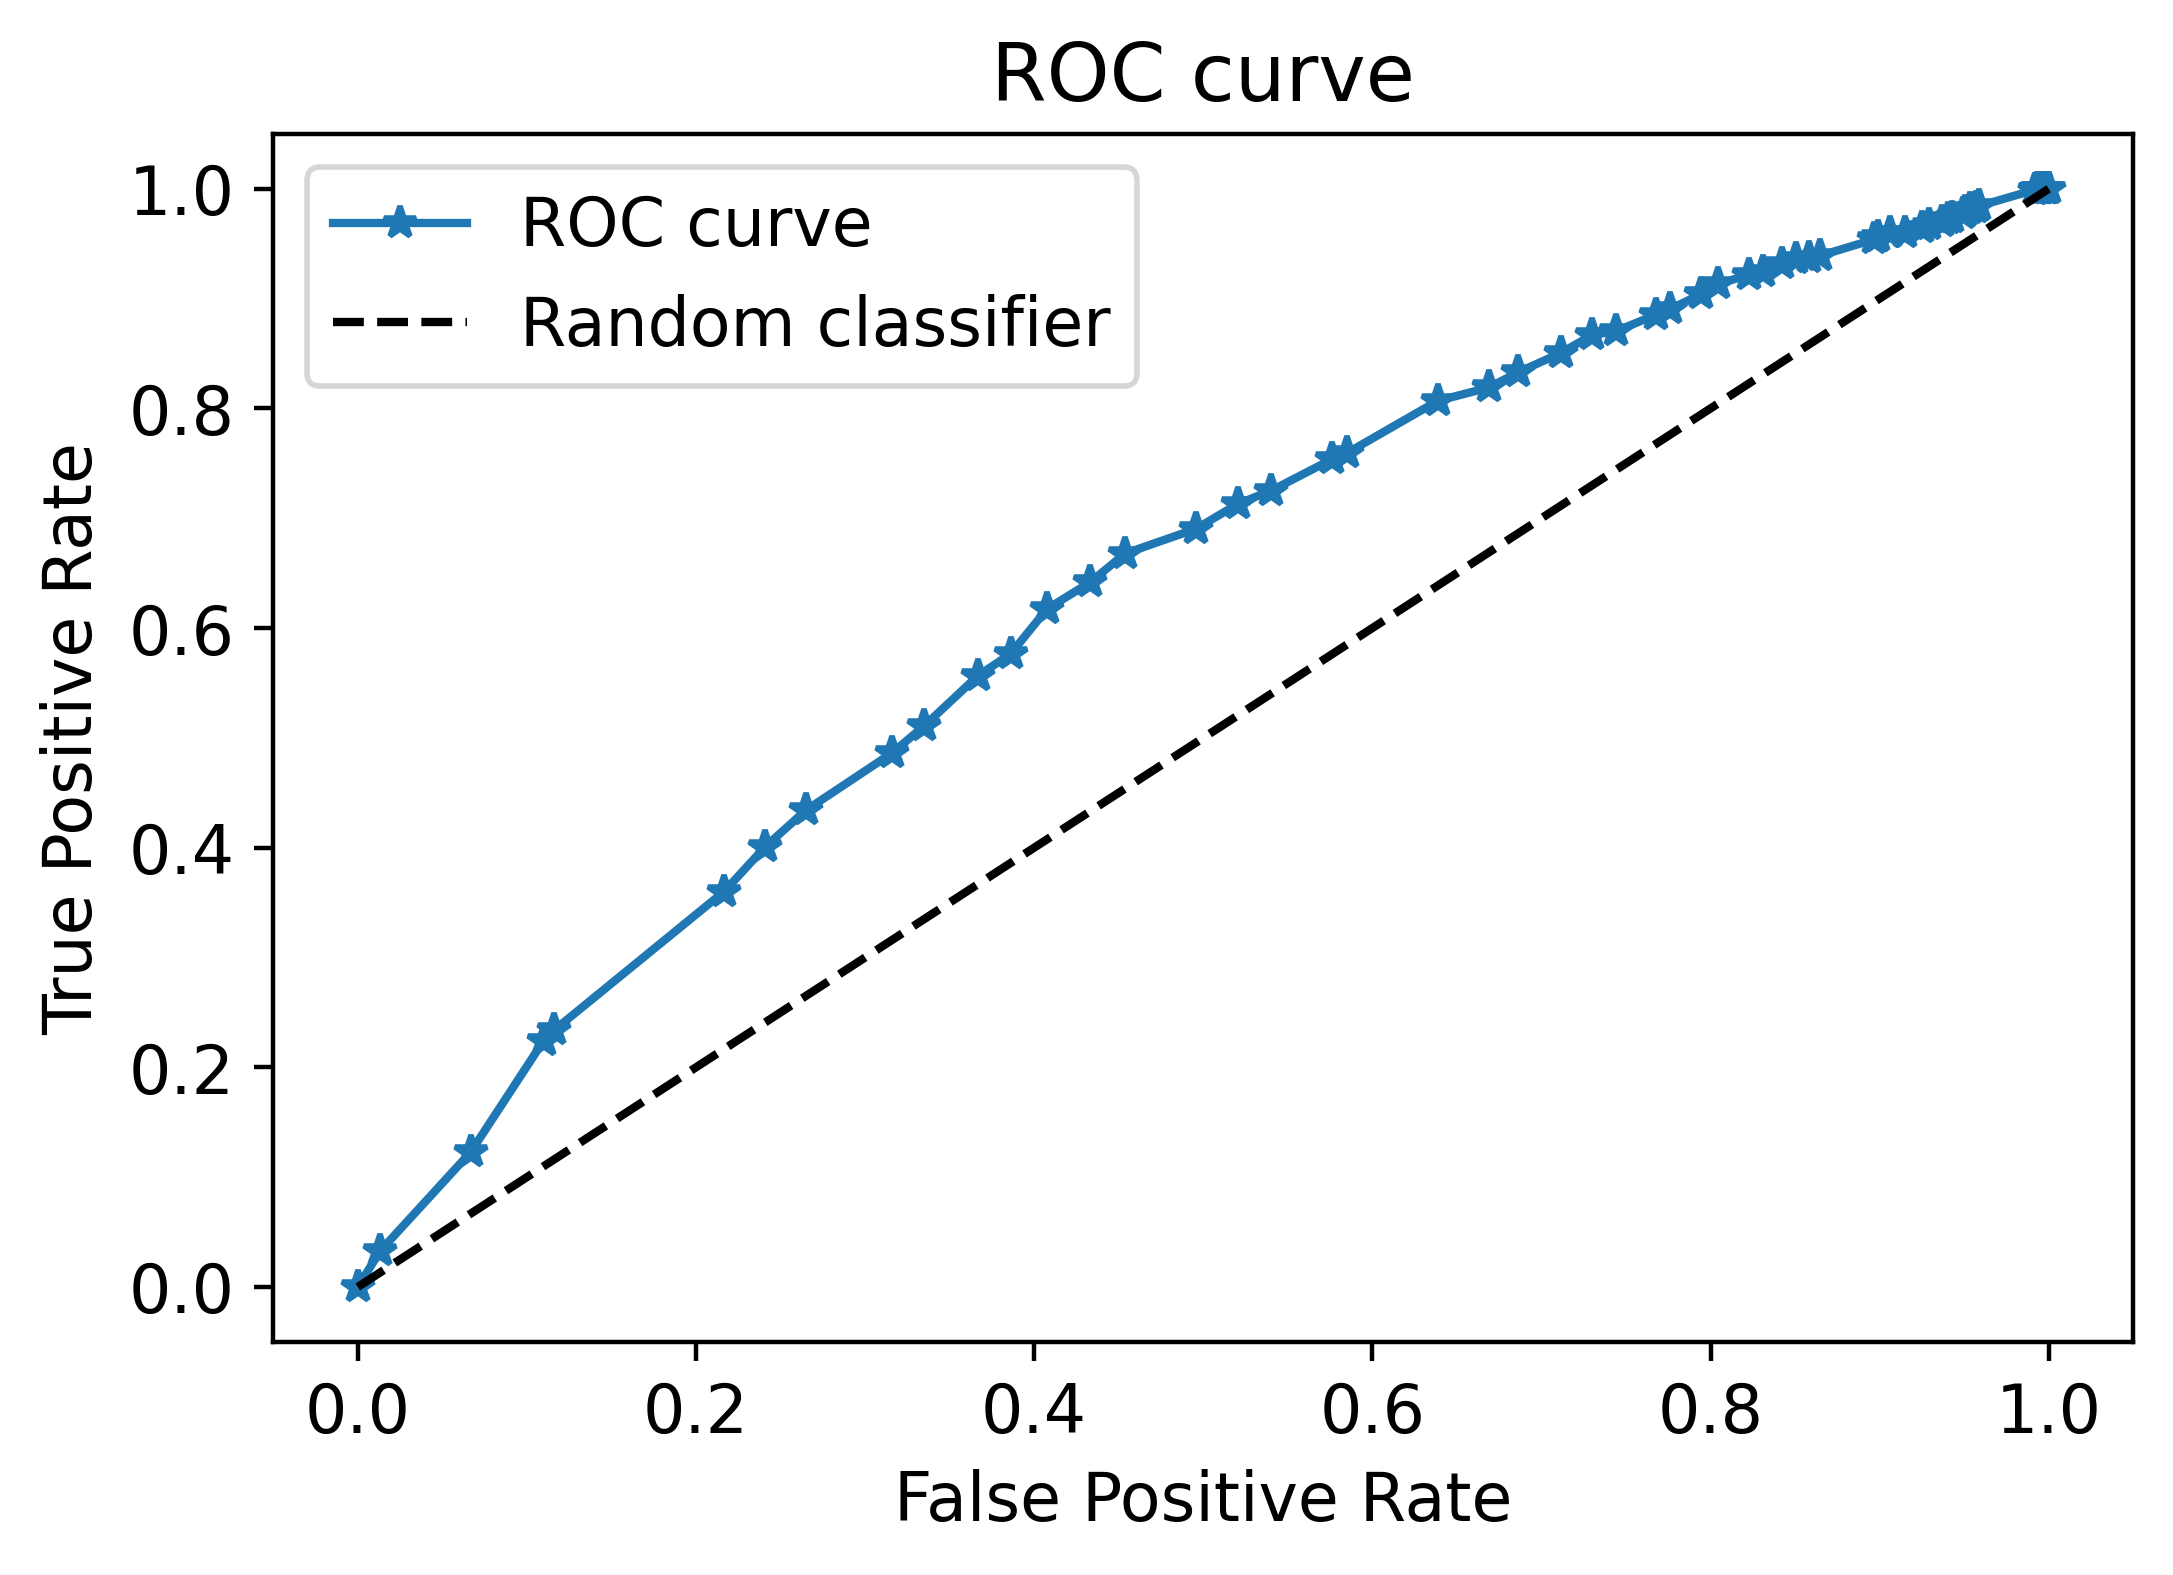

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(['ROC curve', 'Random classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

Precision-Recall

In [46]:
print(f'The recall score is: {metrics.recall_score(y_test, y_pred)}')

#md Precision-Recall curve

The recall score is: 0.0


(0.0, 1.0)

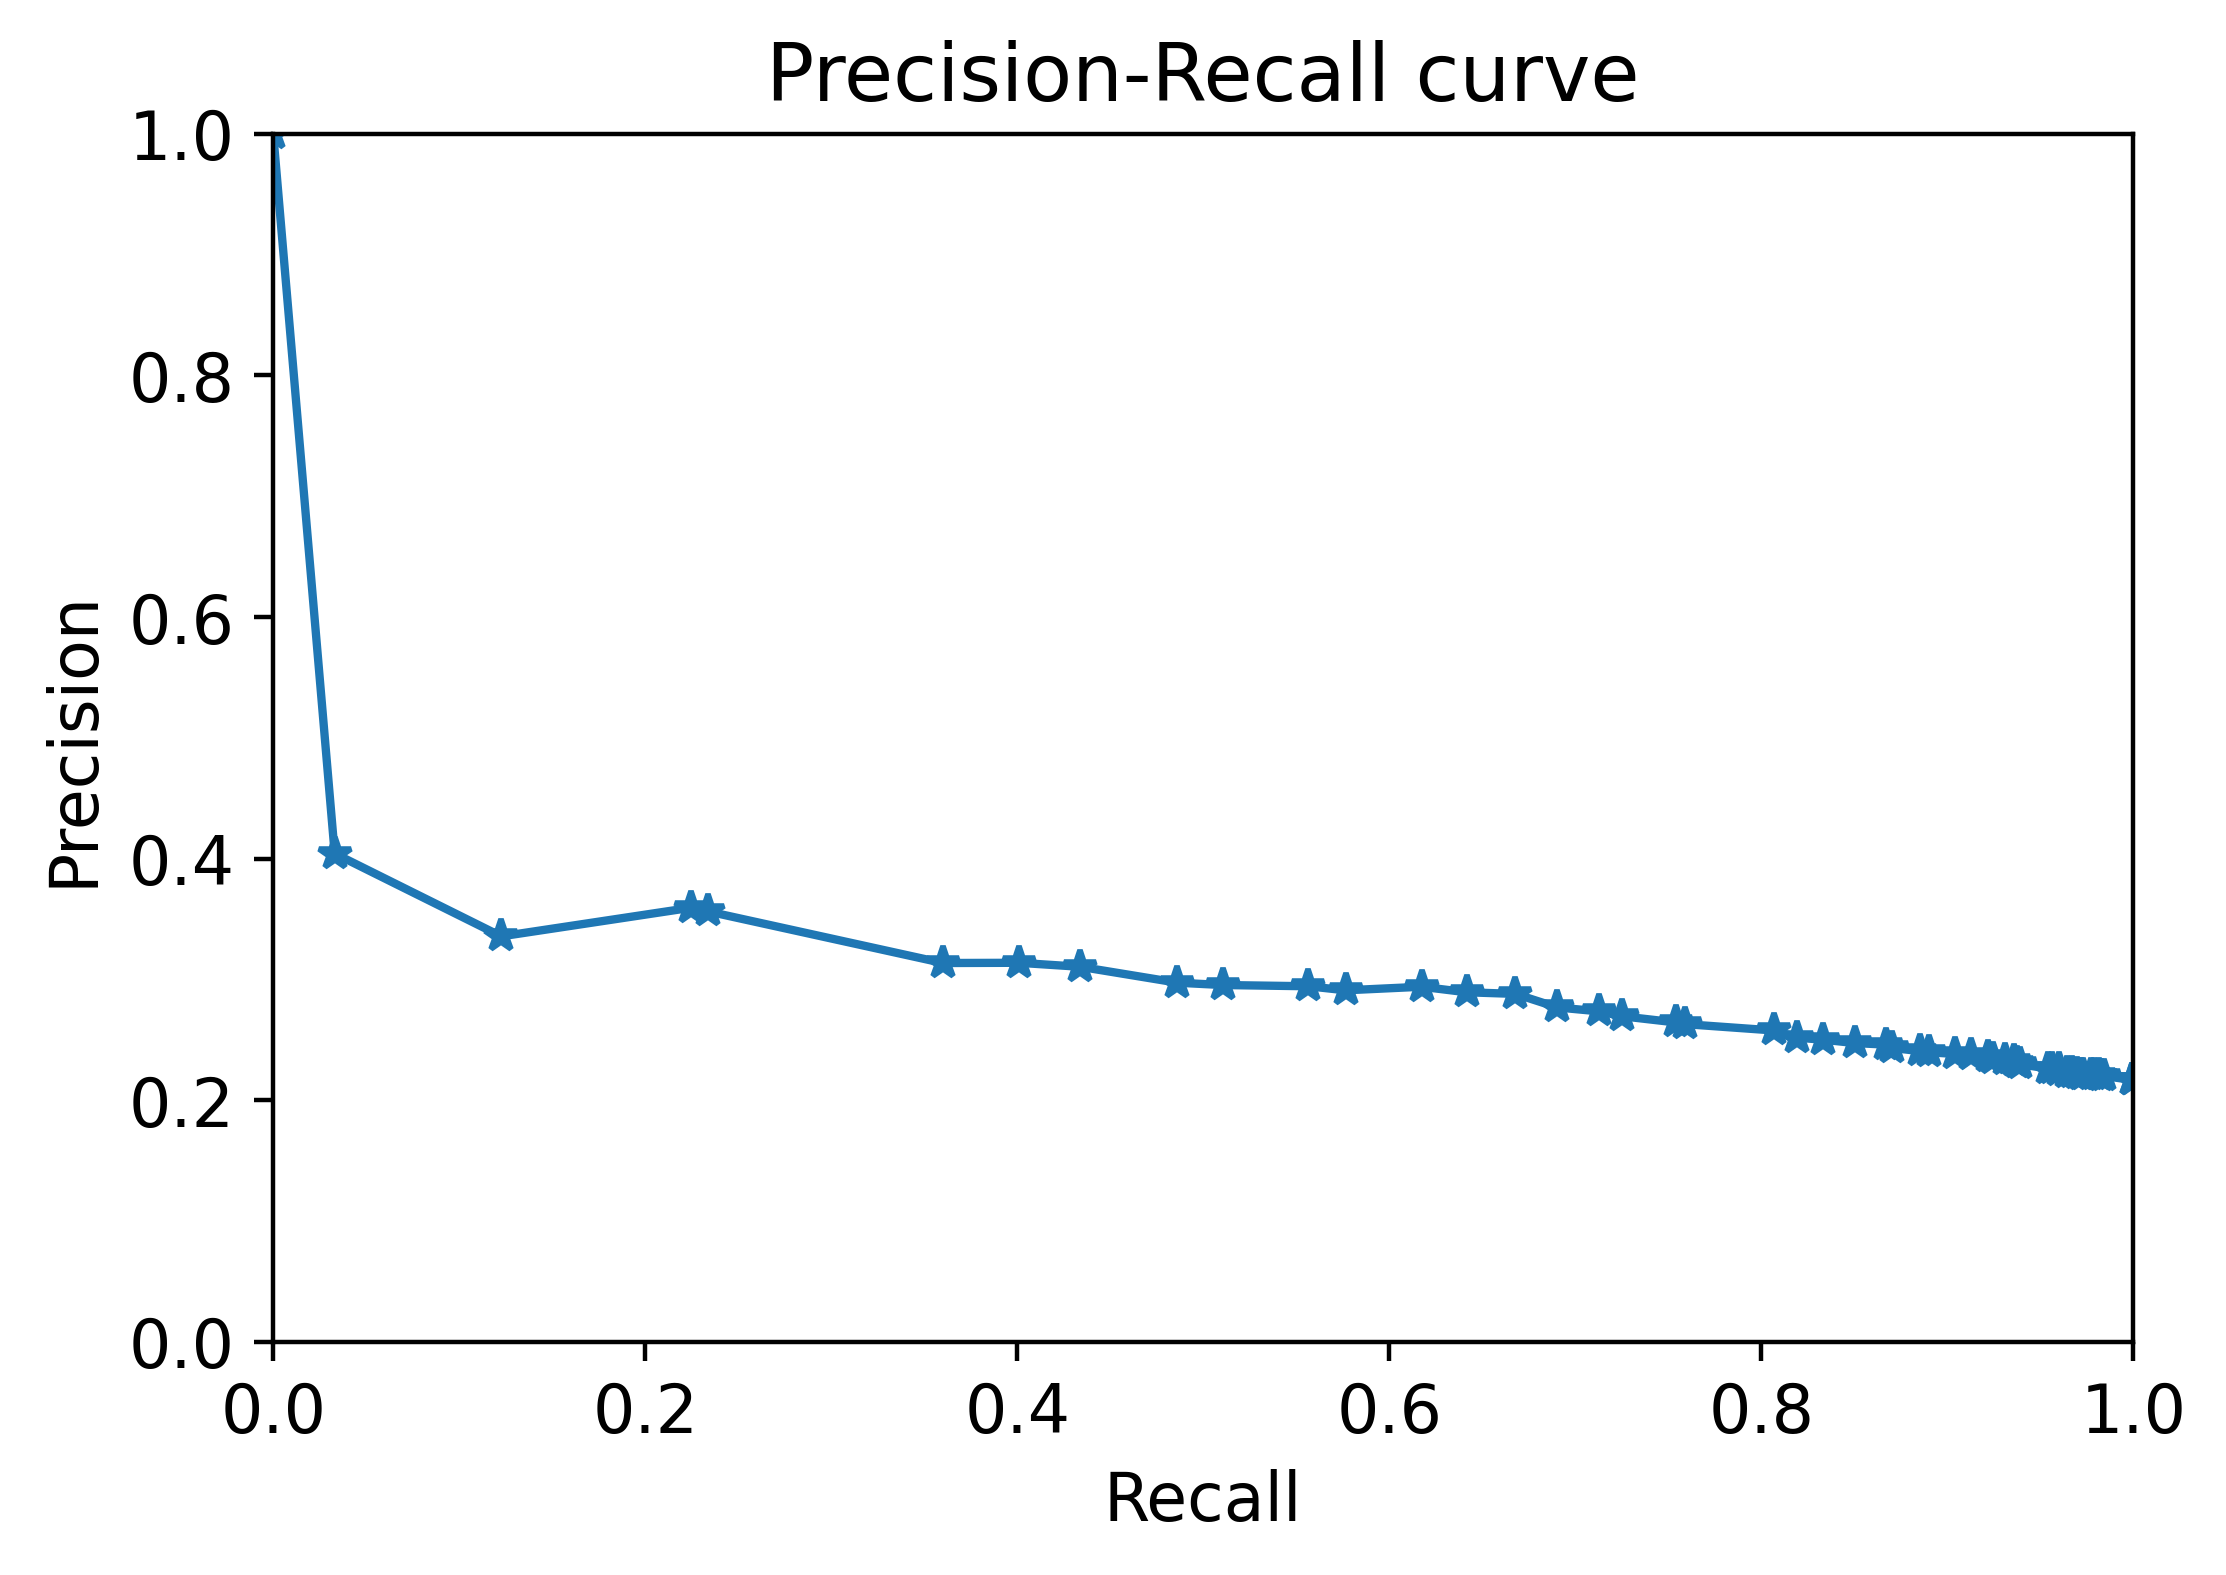

In [50]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.xlim([0, 1])
plt.ylim([0, 1])





In [56]:
print(f'The area under the precision-recall curve is: {metrics.auc(recall, precision)}')

The area under the precision-recall curve is: 0.31275283839480245


array([[4183,    0],
       [1150,    0]], dtype=int64)

# Age classification

In [60]:
X = df[['AGE']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(f'The accuracy model : {model.score(X_test, y_test)}')
print(f'The AUC score is: {metrics.roc_auc_score(y_test, y_pred_proba[:, 1])}')

The accuracy model : 0.7843615225951622
The AUC score is: 0.5058647319897308


In [61]:
#md ROC Curve

Text(0.5, 1.0, 'ROC curve')

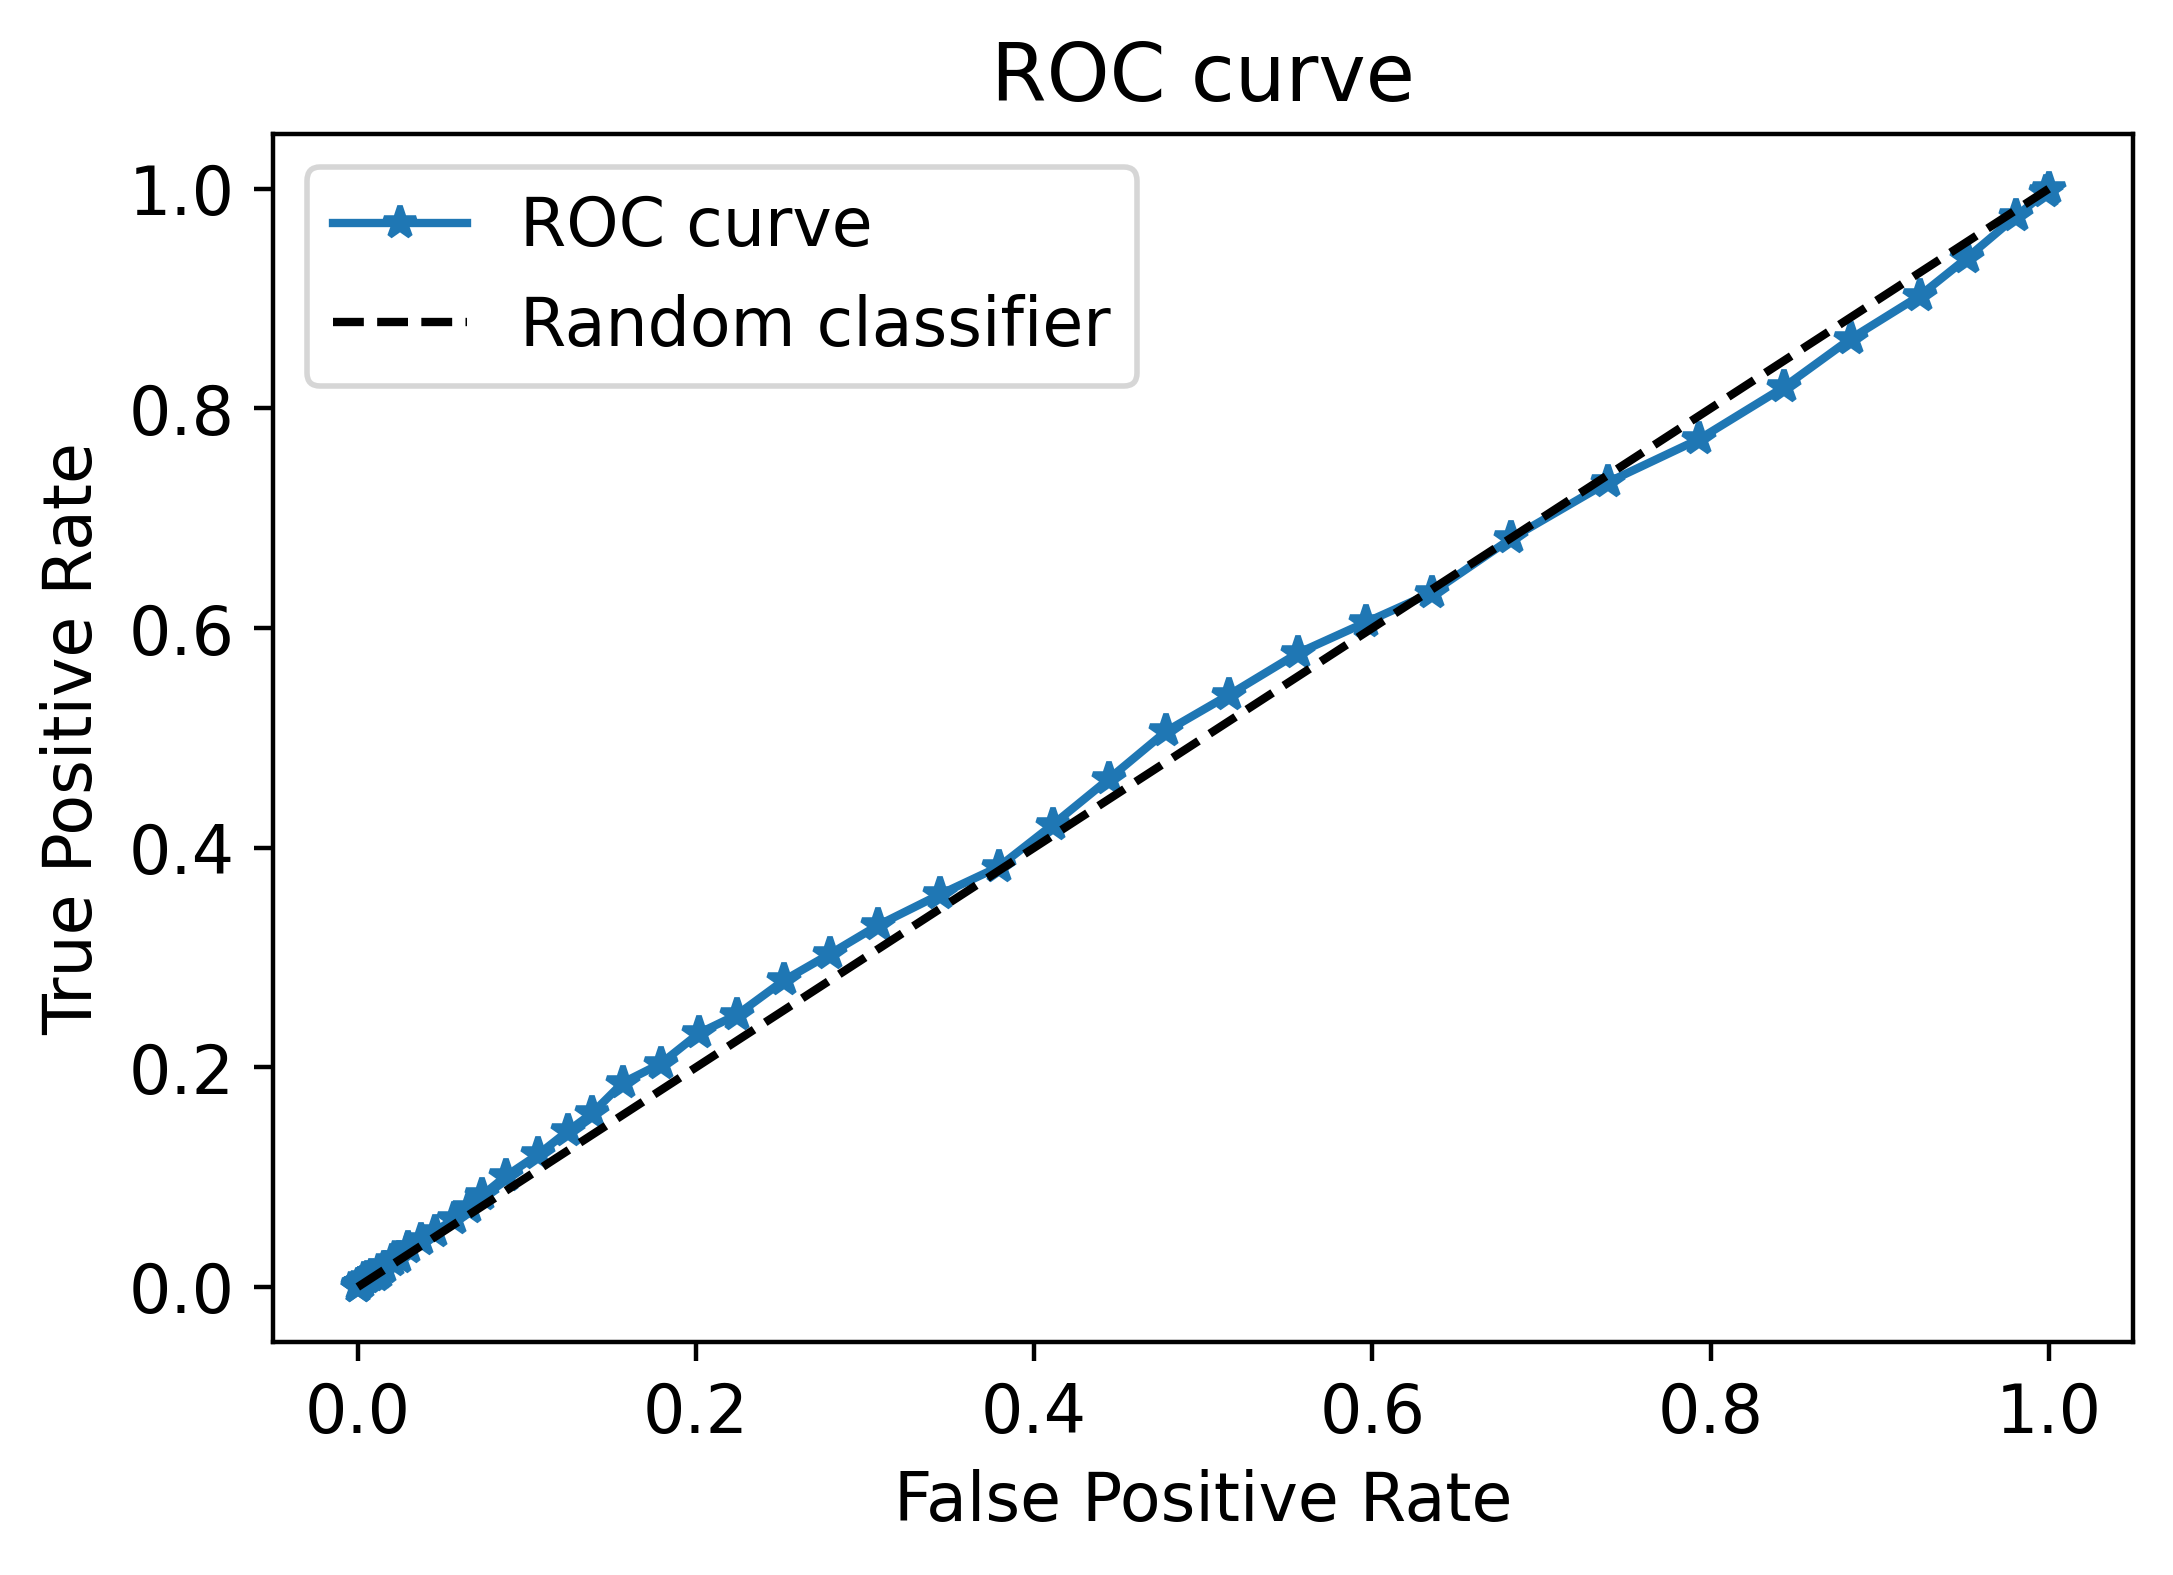

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(['ROC curve', 'Random classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


In [63]:
# Recall curve

(0.0, 1.0)

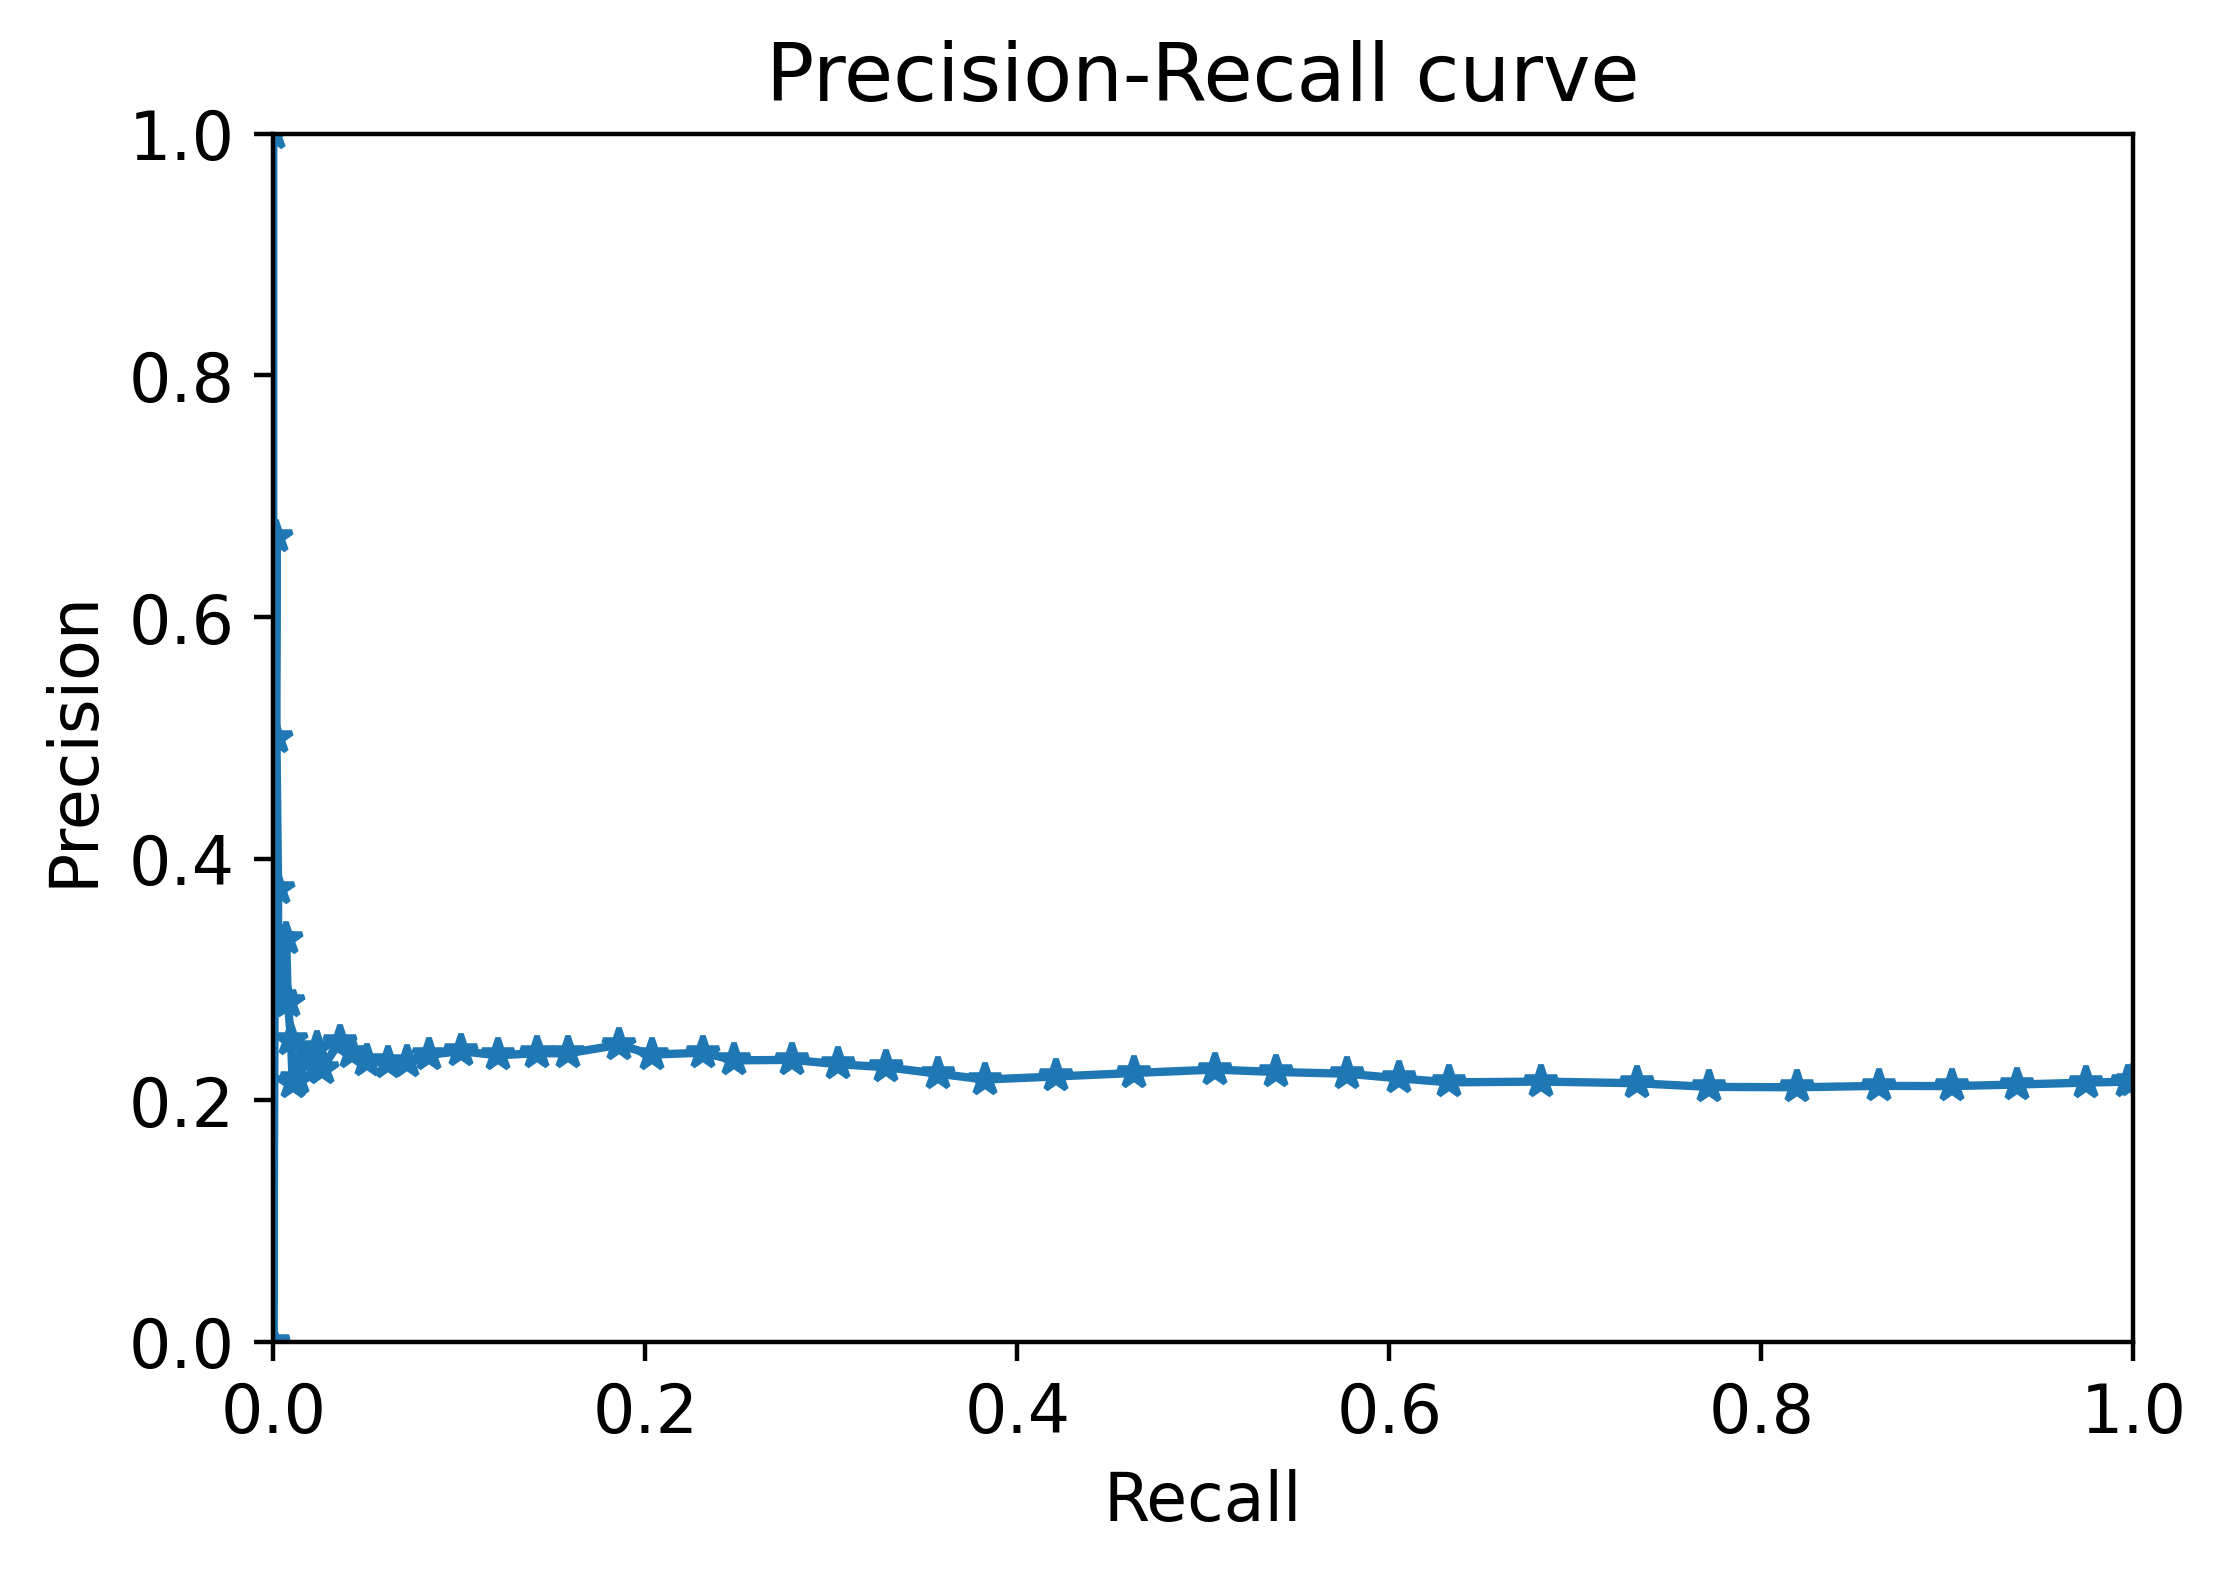

In [64]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.xlim([0, 1])
plt.ylim([0, 1])




In [67]:
print(f'The area under the precision-recall curve is: {metrics.auc(recall, precision)}')
print(f'The recall score is: {metrics.recall_score(y_test, y_pred)}')
print (f'The ROC AUc score is: {metrics.roc_auc_score(y_test, y_pred_proba[:, 1])}')


The area under the precision-recall curve is: 0.22398172126260407
The recall score is: 0.0
The ROC AUc score is: 0.5058647319897308


0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64